In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("./Random_Forest_Dataset_Pima.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Extracting the input and output features
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [7]:
# Standardising the data

from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split

# Spliting into training and testing data set. Statify is used to maintain the proportion
X_train, X_test, Y_train, Y_test = train_test_split(X, y, stratify=y, test_size=0.20)

In [9]:
# Creating the classifier model. the n_estimator is to denote the number of trees in the forest

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)

In [10]:
# Training and testing the model
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [11]:
# Calculating the accuracy

from sklearn.metrics import accuracy_score

print(accuracy_score(Y_test, Y_pred))

0.7922077922077922


In [12]:
# Now for decision tree
# Creating DataFrame that contains two columns: "feature" and "importance" as determined by the random forest classifier in descending order.

feature_importance_df = pd.DataFrame({"features": list(X.columns), "importance": model.feature_importances_}).sort_values("importance", ascending=False)

feature_importance_df

,features,importance
1,Glucose,0.264612
5,BMI,0.145946
6,DiabetesPedigreeFunction,0.139195
7,Age,0.137588
2,BloodPressure,0.089989
0,Pregnancies,0.086553
4,Insulin,0.069341
3,SkinThickness,0.066777


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Glucose'),
  Text(1, 0, 'BMI'),
  Text(2, 0, 'DiabetesPedigreeFunction'),
  Text(3, 0, 'Age'),
  Text(4, 0, 'BloodPressure'),
  Text(5, 0, 'Pregnancies'),
  Text(6, 0, 'Insulin'),
  Text(7, 0, 'SkinThickness')])

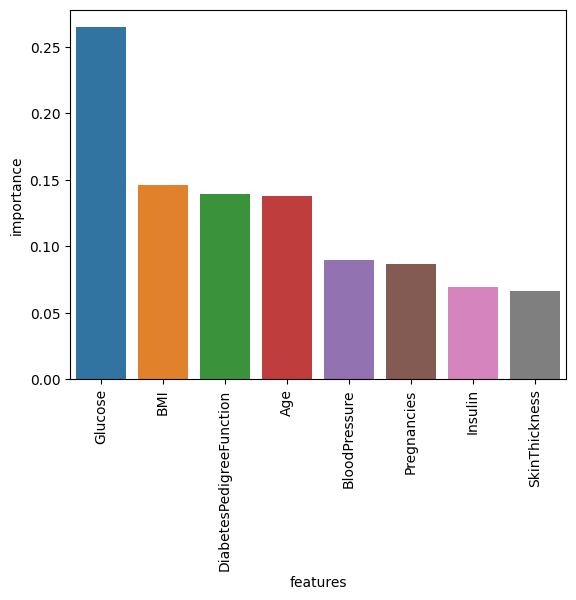

In [14]:
# Visualzing imporatant features

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=feature_importance_df.features, y=feature_importance_df.importance)
plt.xticks(rotation=90)


In [15]:
# Creating the Decsion Tree Classifier

from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()

# Training and testing the model
model2.fit(X_train, Y_train)

Y_pred = model2.predict(X_test)

In [16]:
# Prining the accuracy scores
from sklearn.metrics import accuracy_score

print(accuracy_score(Y_test, Y_pred))

0.7012987012987013
